# New section

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("Mac.csv")
for col in df.columns:
    print(col)

yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [ ]:
print(np.shape(df))

(1453, 15)


In [ ]:
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [ ]:
x=df.iloc[:,:11]
# to convert yes to 1 and no to 0 
def func1(n):
  if n=="Yes":
     return 1
  else:
    return 0
def func(st):
     return st.apply(func1)
x=x.apply(func)

print(x.mean().round(2))
print(df)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    N

In [ ]:

def conv(st):
  if(st=="I hate it!-5"):
    return -5
  elif(st=="I love it!+5"):
    return 5
  else:
    return int(st)
df["Like"]=df["Like"].apply(conv)
v=[list(df["Like"]).count((i)) for i in range(-5,6)]

k=[i for i in range(-5,6)]
dic=dict(zip(k,v))
print(dic)

{-5: 152, -4: 71, -3: 73, -2: 59, -1: 58, 0: 169, 1: 152, 2: 187, 3: 229, 4: 160, 5: 143}


In [ ]:
x=StandardScaler().fit_transform(x)

In [ ]:
pca=PCA(n_components=11)
pc=pca.fit_transform(x)
pcomp=pd.DataFrame(data=pc,columns=[("P"+str(i)) for i in range(1,12)])
print(pcomp)

            P1        P2        P3        P4        P5        P6        P7  \
0     0.704334 -0.437016  0.268698 -0.872074 -1.521184  0.470160 -0.030969   
1    -0.467820  0.364277 -1.596835 -0.004835  0.462385 -0.449321  0.087351   
2     0.191986  1.712949 -0.339413  3.368168 -1.266802  0.148058 -0.606634   
3    -0.116991 -1.155122 -1.003913  0.469589  1.141750 -0.857182  0.015843   
4    -0.034724 -1.390267  0.792275  0.473031 -0.270488 -0.847963 -1.804085   
...        ...       ...       ...       ...       ...       ...       ...   
1448  3.499105  1.069999  0.148971 -0.195977  0.787923  1.016536 -1.977414   
1449 -1.568786  0.899328  1.192503 -0.286497  2.234500  1.258306 -1.764159   
1450 -0.414275  1.810438 -1.071948 -0.901031 -0.750299  0.065975  0.720962   
1451 -2.803630  0.562759  2.278887  0.083924  0.080147 -0.969368 -0.384558   
1452  3.499105  1.069999  0.148971 -0.195977  0.787923  1.016536 -1.977414   

            P8        P9       P10       P11  
0    -0.687116  

In [ ]:
for i in range(11):
  df.iloc[:,i]=df.iloc[:,i].apply(func1)
def conv1(n):
    if(n=="Never"):
      return 0
    elif(n=="Once a year"):
      return 1
    elif(n=="Every three months"):
      return 2
    elif(n=="Once a month"):
      return 3
    elif(n=="Once a week"):
      return 4
    else:
      return 5
def conv2(n):
  if(n=="Male"):
    return 1
  else:
    return 0
df["VisitFrequency"]=df["VisitFrequency"].apply(conv1)
df["Gender"]=df["Gender"].apply(conv2)
print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0    -3   61  

In [ ]:
distortions=[]
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df)
    distortions.append(km.inertia_)
print(distortions)

[313328.16104611155, 90642.54890153672, 53964.75198303959, 37969.6145893275, 31232.692919906796, 27300.884590733564, 24689.13484722231, 22055.194549544645, 19769.583435953828]


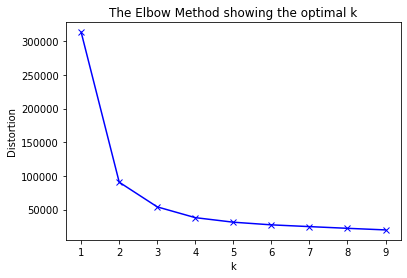

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)